# Python examples in lecture 6
* This file is a jupyter notebook. To run it you can download it from the DLE and run it on your own machine.
* Or you can run it on google collab <https://colab.research.google.com> via your google account. This may be slower than running on your own machine
* Information on downloading notebooks from the store to your computer https://youtu.be/1zY7hIj5tWg

This notebook shows how to run basic SQL commands from python

##  First example of SQL command

**SELECT * FROM orders**

* **\*** means everything
* **orders** is the table name

The database in the file supermarket.db

In [22]:
import sqlite3

connection = sqlite3.connect("supermarket.db")
cursor = connection.cursor()

cursor.execute("SELECT * FROM orders") 
print("fetchall:")
result = cursor.fetchall() 
for r in result:
    print(r)
cursor.execute("SELECT * FROM orders") 
print("\nfetch one:")
res = cursor.fetchone() 
print(res)


fetchall:
(30, 100, 1, '2019-04-1')
(31, 70, 1, '2019-04-8')
(32, 95, 3, '2019-04-15')
(33, 121, 1, '2019-04-22')
(34, 72, 3, '2019-04-30')

fetch one:
(30, 100, 1, '2019-04-1')


##  Second SQL example
* The type command can help unpack the results

In [23]:
import sqlite3

connection = sqlite3.connect("supermarket.db")
cursor = connection.cursor()

cursor.execute("SELECT orders FROM orders where date='2019-04-15'") 
print("\nfetch one:")
res = cursor.fetchone() 
print(res)
print(type(res))



fetch one:
(95,)
<class 'tuple'>


## An important note

* The python script and the database file (supermarket.db) have to be in the same directory for this script to work.

* If the python script doesn't find the database file, it will exit and print the confusing error message that it can't find the table.

* Sometimes it will also create a version of the database file with zero length, which will then continue to fail.





##  Format of the sqlite file

* Typically there are no applications on PC/mac to read sqlite file.
* Online tools can help debug https://inloop.github.io/sqlite-viewer/


## Bigger example

<blockquote>
    The management of a company have noticed that the
productivity of the firm is reduced, because a
number of employees are off sick because of the flu.
The CEO suggests that it would be interesting to see 
if it was cost effective for the company to pay for 
the flu jab for all employees.
</blockquote>

The human resources department has two tables stored
in a SQLite database in the file: **HR_info.db**. 
This file is available from the DLE.




##  Flu jab example continued

The database (\textbf{HR\_info.db}) contains two tables <br>

TABLE **HR_info** with the columns:
* **staff_number** INTEGER PRIMARY KEY
* **salary** INTEGER
* **age** INTEGER

TABLE **flu_info** with the columns:
* **flu_treatment** INTEGER PRIMARY KEY
* **staff_number** INTEGER 
* **days_off** INTEGER



##  Reading in all the information from one table

The file HR_info.db is on the DLE.

In [24]:
import sqlite3
connection = sqlite3.connect("HR_info.db")
cursor = connection.cursor()
cursor.execute("SELECT * FROM HR_info  ") 
result = cursor.fetchall() 
print("Staff_number Salary Age") 
for r in result:
    print(r[0], r[1], r[2])

Staff_number Salary Age
0 30000 64
1 35000 37
2 35000 56
3 25000 30
4 35000 42
5 30000 51
6 30000 46
7 20000 55
8 20000 21
9 25000 57
10 30000 46
11 35000 30
12 35000 70
13 20000 27
14 30000 51
15 30000 48
16 30000 21
17 25000 58
18 30000 61
19 25000 63
20 30000 70
21 25000 55
22 30000 38
23 25000 44
24 20000 64
25 35000 24
26 25000 35
27 20000 21
28 30000 45
29 25000 29


##  A more complex query

Find employee over 50 who earn more than 30,000 pounds

In [25]:
import sqlite3
connection = sqlite3.connect("HR_info.db")
cursor = connection.cursor()
cursor.execute("SELECT * FROM HR_info where age > 55 and salary > 30000 ") 
result = cursor.fetchall() 
print("Staff_number Salary Age") 
for r in result:
    print(r[0], r[1], r[2])

Staff_number Salary Age
2 35000 56
12 35000 70


## Pulling the data from the table and plotting it

0 30000 64
1 35000 37
2 35000 56
3 25000 30
4 35000 42
5 30000 51
6 30000 46
7 20000 55
8 20000 21
9 25000 57
10 30000 46
11 35000 30
12 35000 70
13 20000 27
14 30000 51
15 30000 48
16 30000 21
17 25000 58
18 30000 61
19 25000 63
20 30000 70
21 25000 55
22 30000 38
23 25000 44
24 20000 64
25 35000 24
26 25000 35
27 20000 21
28 30000 45
29 25000 29


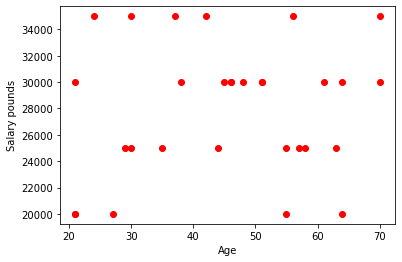

In [26]:
import sqlite3
import matplotlib.pyplot as plt
connection = sqlite3.connect("HR_info.db")
cursor = connection.cursor()
cursor.execute("SELECT * FROM HR_info") 
result = cursor.fetchall() 
age = [] 
salary = [] 
for r in result:
    print(r[0], r[1], r[2])
    salary.append(r[1])
    age.append(r[2])
plt.plot(age,salary, "ro")
plt.xlabel('Age')
plt.ylabel(r'Salary pounds')
plt.show()


##  Extracting information from SQLlite file


* What if we are given the file **HR_info.db** but no information about the tables.

* Can we find the table names and the names of the columns?

* Is the datafile self describing?


There is a command line interface to sqlite
(https://www.sqlite.org/cli.html). This is typically installed
with Anaconda.


* **sqlite3.exe** on Windows

* **sqlite3** program on my Mac.


This program is useful for looking at small files.



On my Mac using the command:  sqlite3 HR_info.db

<pre>
sqlite3 HR_info.db
sqlite> .databases
main: ./HR_info.db
sqlite> .schema
CREATE TABLE HR_info (
staff_number INTEGER PRIMARY KEY,
salary INTEGER,
age INTEGER);
CREATE TABLE flu_info (
flu_treatment INTEGER PRIMARY KEY,
staff_number INTEGER,
days_off INTEGER);

</pre>

## Finding the tables in HR_info.db

The file **HR_info.db** is on the DLE.


In [27]:
import sqlite3
connection = sqlite3.connect("HR_info.db")
cursor = connection.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';") 
result = cursor.fetchall() 
for r in result:
    print(r)


('HR_info',)
('flu_info',)


## Finding the column names in HR_info.db

* The file HR_info.db is on the DLE.
* The example below finds the column names of the table HR_info
* PRAGMA  is specific to SQLite, so it is not portable to other databases (https://www.sqlite.org/pragma.html.)


In [28]:
import sqlite3
connection = sqlite3.connect("HR_info.db")
cursor = connection.cursor()
cursor.execute("PRAGMA table_info(HR_info);") 
result = cursor.fetchall() 
for r in result:
    print(r)

(0, 'staff_number', 'INTEGER', 0, None, 1)
(1, 'salary', 'INTEGER', 0, None, 0)
(2, 'age', 'INTEGER', 0, None, 0)


##  Checking whether the database file exists
* One issue is that the sqlite database connect will not produce an error, if that file does not exist.
* Even worse the the API will create an empty database file 

In principle, it would be better to use exceptions (https://www.w3schools.com/python/python_try_except.asp)
to check whether the file exists,
before you try too read it

In [29]:
# this example will not catch the error if the file new_info.db  does not exist
import sqlite3
try:
  connection = sqlite3.connect("new_info.db")
except sqlite3.Error as err:
  print("Error reading database file")

print("Start to work with the database")

Start to work with the database


##  Testing whether a file exists
* The os module (os - Operating System ) can check whether a file exists
* See  https://www.digitalocean.com/community/tutorials/python-os-module for more information

In [30]:
# Code to test whether a file exists
import os

file_name = "HGR_info.db"
if os.path.isfile(file_name) :
     print(file_name , " exists")
else:
     print(file_name , " NOT found")


HGR_info.db  NOT found


##  Checking whether a file exists
* By using special syntax Uniform Resource Identifier URI the open of the database can be 
* https://www.sqlite.org/uri.html

See the following for more infoormation
*  https://stackoverflow.com/questions/57828286/how-to-make-sqlite3-connect-fail-if-the-db-file-does-not-exist

In [31]:
# see information 
import sqlite3
database_file = "HR_info.db"
try:
    # The open of the database is now readonly "ro"
    connection = sqlite3.connect("file:" + database_file  + "?mode=ro", uri=True)
except sqlite3.Error as err:
  print("Error reading the file " , database_file)



In [33]:
#! rm GHR_info.db
